# FORECASTING THE COST OF HOMES

Author: Oluwatimilehin Folarin

Date: 25-07-2022

### PROBLEM STATEMENT

In this project, I will be establishing the machine learning model capable of predicting the best future house sale prices.

### FILES

The data contains 21613 rows and 21 columns 

The “price” column is the target.

## Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [3]:
data = pd.read_excel(r"C:\Users\Oluwatimilehin F\Documents\Data SC\ZUMMIT\house_data.xlsx")

## Exploratory Data Analysis

### Showing the head and tail of the data

In [4]:
print ("\nHead of the train data")

data.head()


Head of the train data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print ("\nTail of the train data")

data.tail()


Tail of the train data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## The rows and columns (shape) of the data

In [6]:
data.shape

(21613, 21)

## Checking for Missing values

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
'''
The data is very clean. NO MISSING VALUE
'''

'\nThe data is very clean. NO MISSING VALUE\n'

## INFO

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Statistical Analysis

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Checking correlation

In [11]:
data_corr = data.drop('id', axis=1)
data_num = data_corr.select_dtypes(include=['float64', 'int64'])

<AxesSubplot:>

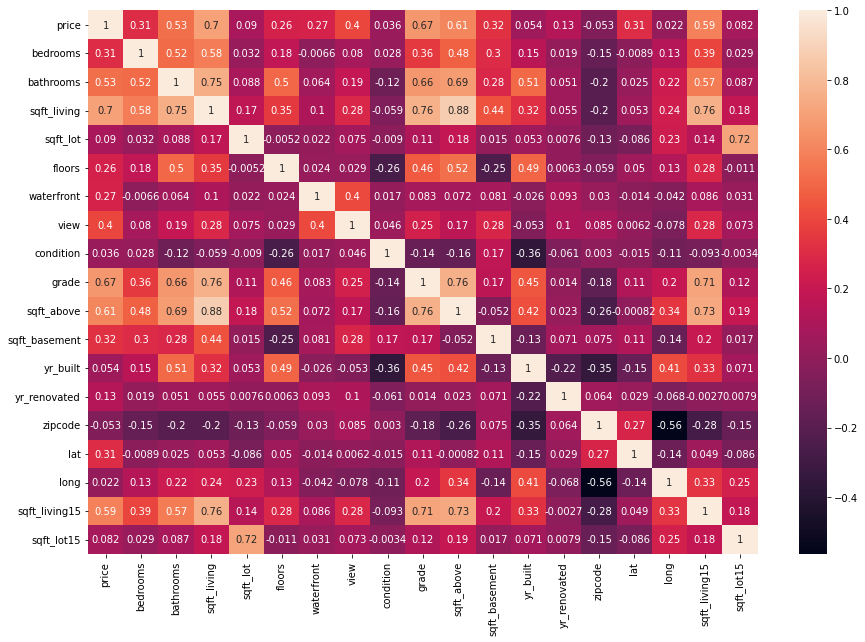

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data_corr.corr(), annot=True)

In [13]:
data_corr_num = data_num.corr()['price'][1:]

print(f'The correlation coefficient of the features and price')
display(data_corr_num.sort_values())

The correlation coefficient of the features and price


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
Name: price, dtype: float64

##### It can be seen that the following are highy correlated and largely influnece the price of the home:
<li>size of the bathroom,
<li>square feet above, 
<li>grade, and 
<li>size of the living room 

## Visualizations of the distribution of the features

<Figure size 720x360 with 0 Axes>

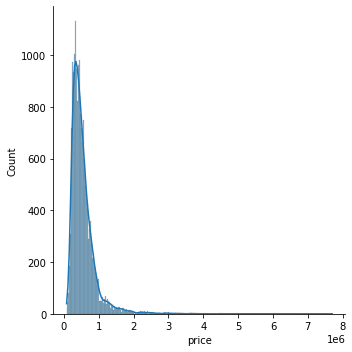

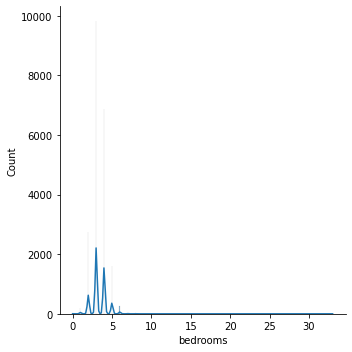

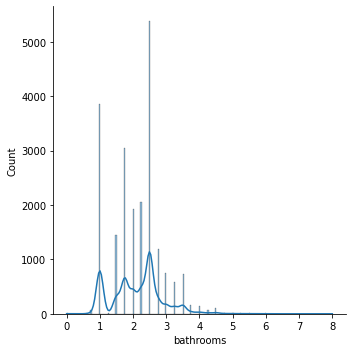

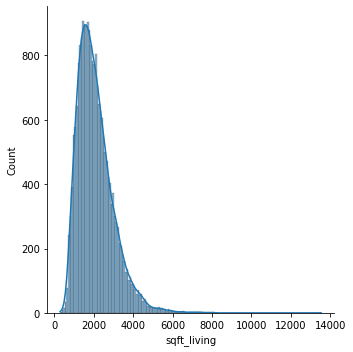

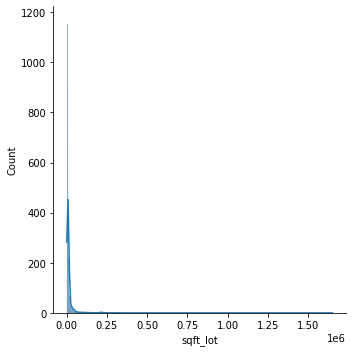

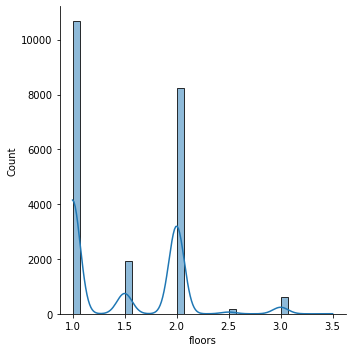

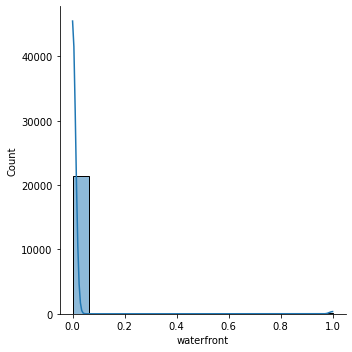

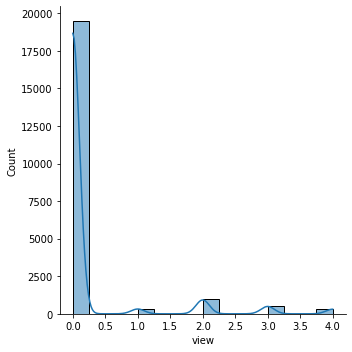

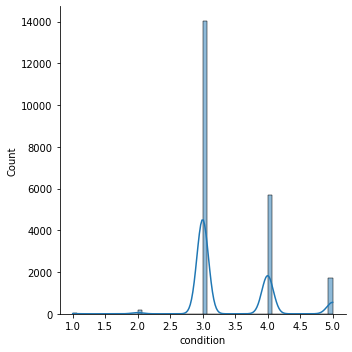

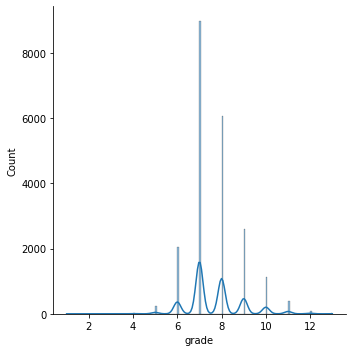

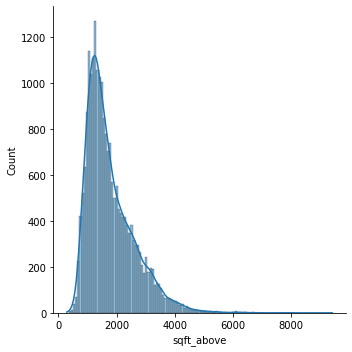

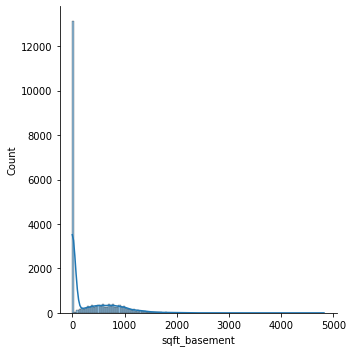

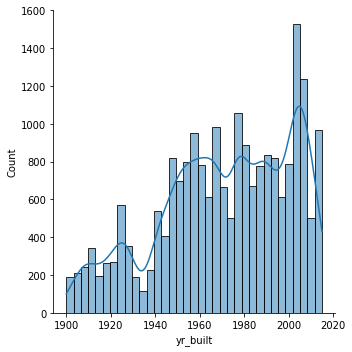

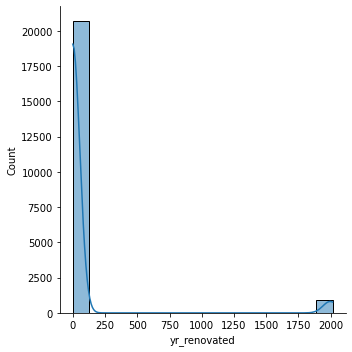

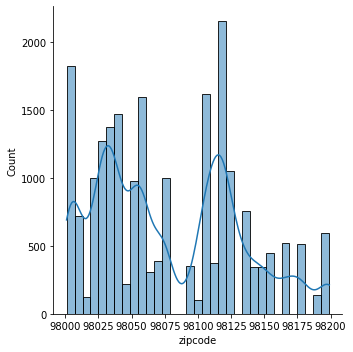

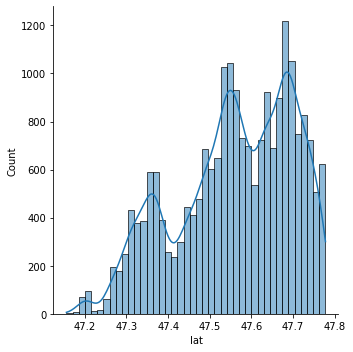

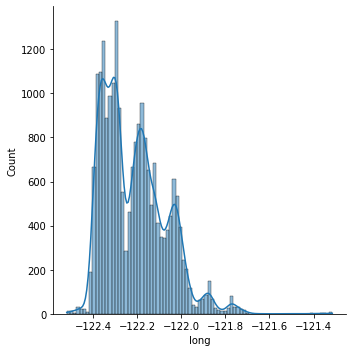

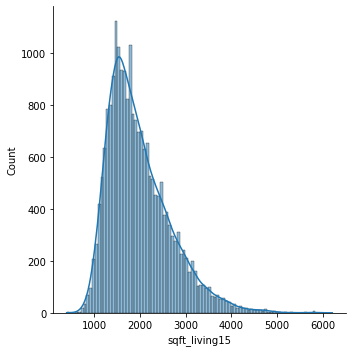

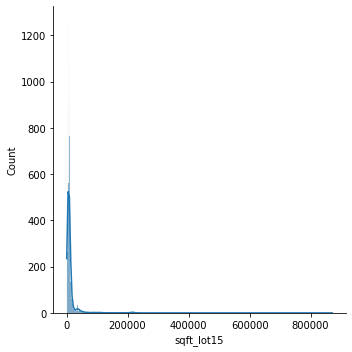

In [14]:
data_columns = data_num.columns
plt.figure(figsize=(10, 5))
for c in data_columns:
    sns.displot(data[c], kde=True)

## Closer check of some features

In [15]:
data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<AxesSubplot:title={'center':'Number of Bathrooms'}, xlabel='bathrooms', ylabel='count'>

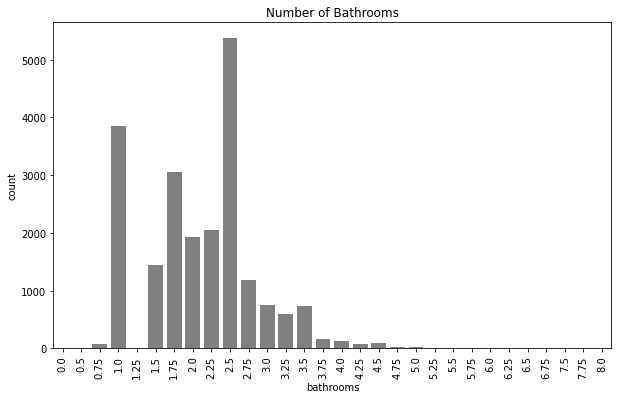

In [16]:
plt.figure(figsize=(10,6))
plt.xticks(rotation ='vertical')
plt.title('Number of Bathrooms')
sns.countplot(data['bathrooms'].sort_values(), color='gray')

In [17]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<AxesSubplot:title={'center':'Number of Bedrooms'}, xlabel='bedrooms', ylabel='count'>

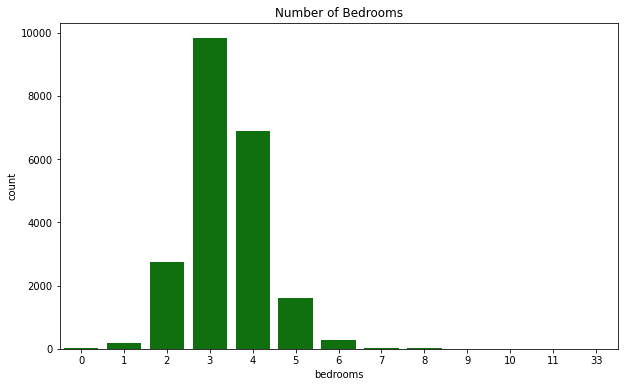

In [18]:
plt.figure(figsize=(10,6))
plt.title("Number of Bedrooms")

sns.countplot(data['bedrooms'].sort_values(), color='green')

In [19]:
data['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<AxesSubplot:title={'center':'Year built'}, xlabel='yr_built', ylabel='count'>

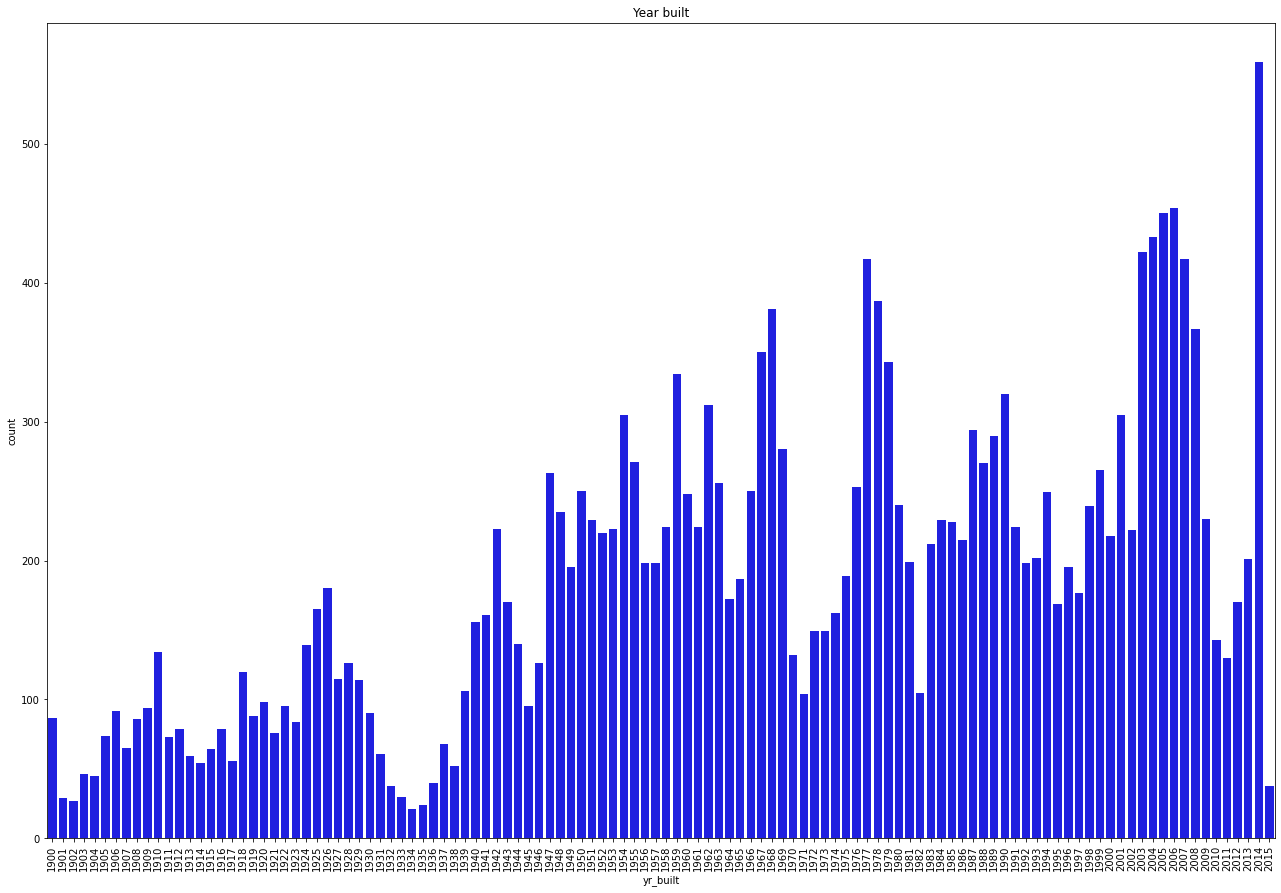

In [20]:
plt.figure(figsize=(22,15))
plt.xticks(rotation = 'vertical')
plt.title('Year built')

sns.countplot(data['yr_built'].sort_values(), color='blue')

In [21]:
data['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<AxesSubplot:title={'center':'Year Renovated'}, xlabel='yr_renovated', ylabel='count'>

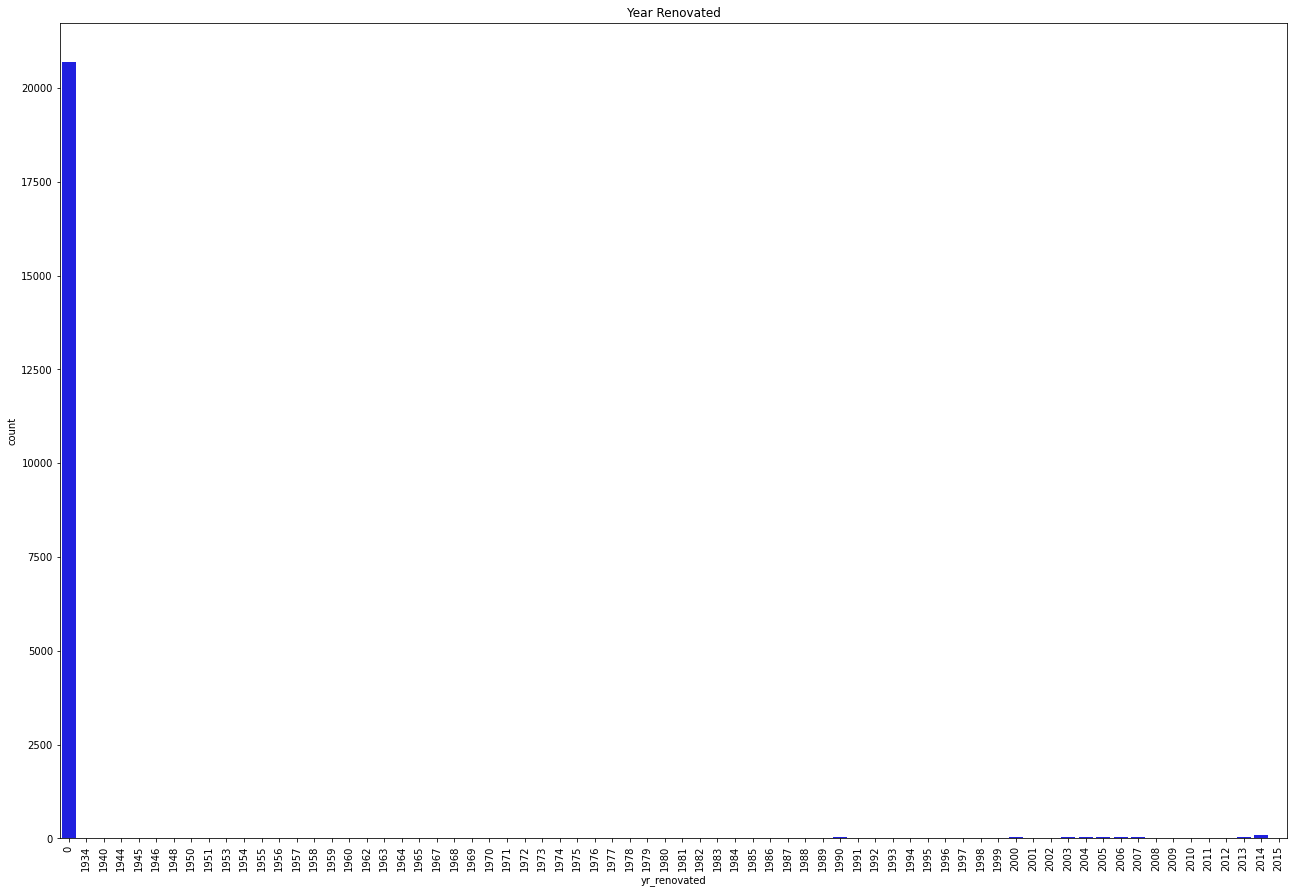

In [22]:
plt.figure(figsize=(22,15))
plt.xticks(rotation = 'vertical')
plt.title('Year Renovated')

sns.countplot(data['yr_renovated'].sort_values(), color='blue')

In [23]:
'''
Majority of the homes have not been renovated
'''

'\nMajority of the homes have not been renovated\n'

In [24]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

<AxesSubplot:title={'center':'View'}, xlabel='view', ylabel='count'>

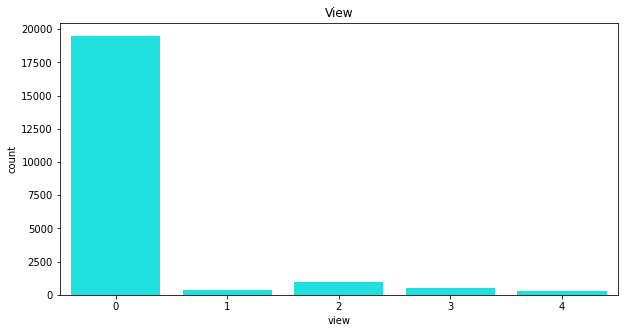

In [25]:
plt.figure(figsize=(10,5))
plt.title('View')
sns.countplot(data['view'].sort_values(), color='cyan')

In [26]:
data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

<AxesSubplot:title={'center':'Grade'}, xlabel='grade', ylabel='count'>

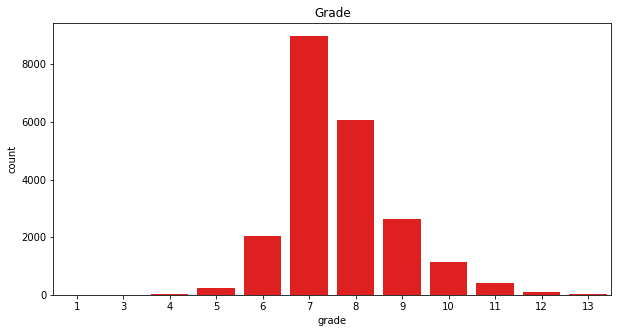

In [27]:
plt.figure(figsize=(10,5))
plt.title('Grade')
sns.countplot(data['grade'].sort_values(), color='red')

## Feature Engineering

In [28]:
X = data_num.iloc[:, 1:].values
y = data_num.iloc[:, 0].values

### Splitting data

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling using MinMaxSCaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Modelling and Evaluation

### Importing Machine Learning Algorithms

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

### Determing the best K-value for KNN

Text(0.5, 1.0, 'K-value Vs Mean error')

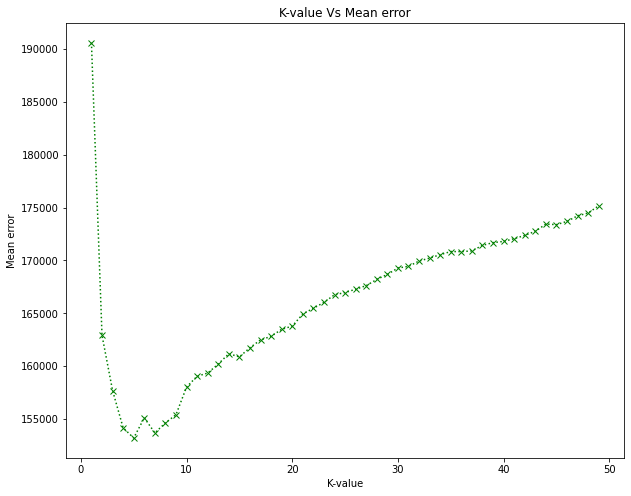

In [32]:
error = []
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

for i in range(1,50):
    kn = KNeighborsRegressor(n_neighbors = i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    err = sqrt(mean_squared_error(y_test, pred_i)) 
    error.append(err)

plt.figure(figsize = (10,8))
plt.plot(range(1,50), error, color='green', linestyle='dotted', marker='x', markerfacecolor='black')
plt.xlabel("K-value")
plt.ylabel("Mean error")
plt.title("K-value Vs Mean error")

### Initiating the Machine Leanrning Algorithms

In [33]:
modelLR = LinearRegression()

modelRFR = RandomForestRegressor(n_estimators = 100, random_state = 0)

modelDTR = DecisionTreeRegressor(random_state = 0)

modelKNN = KNeighborsRegressor(n_neighbors = 5)

modelCAT = CatBoostRegressor()



In [34]:
modelLR.fit(X_train, y_train)
modelRFR.fit(X_train, y_train)
modelDTR.fit(X_train, y_train)
modelKNN.fit(X_train, y_train)
modelCAT.fit(X_train, y_train)

Learning rate set to 0.064232
0:	learn: 356993.4954590	total: 214ms	remaining: 3m 34s
1:	learn: 342625.1780652	total: 224ms	remaining: 1m 51s
2:	learn: 329275.7572827	total: 232ms	remaining: 1m 17s
3:	learn: 317088.7292884	total: 241ms	remaining: 60s
4:	learn: 305954.1602769	total: 250ms	remaining: 49.7s
5:	learn: 295454.1634209	total: 258ms	remaining: 42.8s
6:	learn: 285467.8156095	total: 267ms	remaining: 37.8s
7:	learn: 276185.2438454	total: 275ms	remaining: 34.2s
8:	learn: 267888.6809090	total: 284ms	remaining: 31.3s
9:	learn: 259588.2884833	total: 293ms	remaining: 29s
10:	learn: 251301.2015679	total: 301ms	remaining: 27.1s
11:	learn: 244430.8629696	total: 309ms	remaining: 25.4s
12:	learn: 237275.1980608	total: 317ms	remaining: 24s
13:	learn: 230964.0230415	total: 325ms	remaining: 22.9s
14:	learn: 225139.2188102	total: 334ms	remaining: 21.9s
15:	learn: 219815.9865827	total: 343ms	remaining: 21.1s
16:	learn: 214578.5851757	total: 351ms	remaining: 20.3s
17:	learn: 209566.2361309	total

148:	learn: 109581.3839030	total: 1.24s	remaining: 7.1s
149:	learn: 109474.7592772	total: 1.25s	remaining: 7.09s
150:	learn: 109393.2472775	total: 1.26s	remaining: 7.08s
151:	learn: 109257.4371168	total: 1.27s	remaining: 7.07s
152:	learn: 109149.9989106	total: 1.28s	remaining: 7.06s
153:	learn: 108979.8286336	total: 1.28s	remaining: 7.06s
154:	learn: 108854.7403837	total: 1.29s	remaining: 7.06s
155:	learn: 108645.8817204	total: 1.3s	remaining: 7.05s
156:	learn: 108527.8784398	total: 1.31s	remaining: 7.04s
157:	learn: 108362.3684083	total: 1.32s	remaining: 7.03s
158:	learn: 108244.1388856	total: 1.33s	remaining: 7.02s
159:	learn: 108140.5186098	total: 1.33s	remaining: 7.01s
160:	learn: 108032.6112051	total: 1.34s	remaining: 6.99s
161:	learn: 107907.0177003	total: 1.35s	remaining: 6.97s
162:	learn: 107795.2379125	total: 1.35s	remaining: 6.95s
163:	learn: 107676.9885699	total: 1.36s	remaining: 6.92s
164:	learn: 107570.8462291	total: 1.36s	remaining: 6.9s
165:	learn: 107425.1487943	total: 

301:	learn: 94299.3003369	total: 2.26s	remaining: 5.23s
302:	learn: 94253.8227143	total: 2.27s	remaining: 5.23s
303:	learn: 94160.9304161	total: 2.28s	remaining: 5.22s
304:	learn: 94103.6219365	total: 2.29s	remaining: 5.22s
305:	learn: 94031.1628297	total: 2.3s	remaining: 5.21s
306:	learn: 93982.4088497	total: 2.3s	remaining: 5.2s
307:	learn: 93922.7773366	total: 2.31s	remaining: 5.19s
308:	learn: 93804.6217402	total: 2.31s	remaining: 5.18s
309:	learn: 93768.3871534	total: 2.32s	remaining: 5.17s
310:	learn: 93696.1419652	total: 2.33s	remaining: 5.15s
311:	learn: 93628.5263093	total: 2.33s	remaining: 5.14s
312:	learn: 93549.8597012	total: 2.34s	remaining: 5.13s
313:	learn: 93501.9128744	total: 2.34s	remaining: 5.12s
314:	learn: 93406.6824528	total: 2.35s	remaining: 5.11s
315:	learn: 93338.1831734	total: 2.35s	remaining: 5.09s
316:	learn: 93273.8967509	total: 2.36s	remaining: 5.08s
317:	learn: 93207.0476771	total: 2.36s	remaining: 5.07s
318:	learn: 93110.7884918	total: 2.37s	remaining: 5

453:	learn: 85619.8063432	total: 3.29s	remaining: 3.96s
454:	learn: 85582.7204583	total: 3.3s	remaining: 3.95s
455:	learn: 85540.1950655	total: 3.31s	remaining: 3.95s
456:	learn: 85495.5163090	total: 3.31s	remaining: 3.94s
457:	learn: 85451.4193278	total: 3.32s	remaining: 3.93s
458:	learn: 85398.6816542	total: 3.32s	remaining: 3.92s
459:	learn: 85350.3064561	total: 3.33s	remaining: 3.91s
460:	learn: 85338.3541285	total: 3.34s	remaining: 3.9s
461:	learn: 85304.8832869	total: 3.34s	remaining: 3.89s
462:	learn: 85264.9523908	total: 3.35s	remaining: 3.88s
463:	learn: 85197.5190288	total: 3.35s	remaining: 3.87s
464:	learn: 85162.5427144	total: 3.36s	remaining: 3.86s
465:	learn: 85137.6708934	total: 3.37s	remaining: 3.86s
466:	learn: 85102.1141263	total: 3.37s	remaining: 3.85s
467:	learn: 85062.3859330	total: 3.38s	remaining: 3.84s
468:	learn: 85018.2644805	total: 3.38s	remaining: 3.83s
469:	learn: 84978.3710043	total: 3.39s	remaining: 3.82s
470:	learn: 84912.2221420	total: 3.39s	remaining: 

612:	learn: 79477.5234635	total: 4.33s	remaining: 2.73s
613:	learn: 79445.3669123	total: 4.33s	remaining: 2.72s
614:	learn: 79413.7314178	total: 4.34s	remaining: 2.72s
615:	learn: 79396.8524140	total: 4.34s	remaining: 2.71s
616:	learn: 79368.8788172	total: 4.35s	remaining: 2.7s
617:	learn: 79317.6474296	total: 4.36s	remaining: 2.69s
618:	learn: 79279.8404619	total: 4.36s	remaining: 2.68s
619:	learn: 79220.9213825	total: 4.37s	remaining: 2.68s
620:	learn: 79177.6501029	total: 4.37s	remaining: 2.67s
621:	learn: 79129.7894334	total: 4.38s	remaining: 2.66s
622:	learn: 79111.0588607	total: 4.38s	remaining: 2.65s
623:	learn: 79085.5543067	total: 4.39s	remaining: 2.65s
624:	learn: 79057.5345723	total: 4.39s	remaining: 2.64s
625:	learn: 79015.3596979	total: 4.4s	remaining: 2.63s
626:	learn: 78991.4215671	total: 4.41s	remaining: 2.62s
627:	learn: 78967.1185999	total: 4.41s	remaining: 2.61s
628:	learn: 78939.7546790	total: 4.42s	remaining: 2.6s
629:	learn: 78915.0233737	total: 4.42s	remaining: 2

768:	learn: 74930.6733532	total: 5.36s	remaining: 1.61s
769:	learn: 74903.4956786	total: 5.36s	remaining: 1.6s
770:	learn: 74879.2948279	total: 5.37s	remaining: 1.59s
771:	learn: 74842.2887405	total: 5.37s	remaining: 1.59s
772:	learn: 74822.5338562	total: 5.38s	remaining: 1.58s
773:	learn: 74781.7439188	total: 5.38s	remaining: 1.57s
774:	learn: 74748.1845992	total: 5.39s	remaining: 1.56s
775:	learn: 74737.5435716	total: 5.39s	remaining: 1.56s
776:	learn: 74719.2221755	total: 5.4s	remaining: 1.55s
777:	learn: 74703.4464570	total: 5.41s	remaining: 1.54s
778:	learn: 74693.2546507	total: 5.41s	remaining: 1.53s
779:	learn: 74662.0026731	total: 5.42s	remaining: 1.53s
780:	learn: 74636.1812947	total: 5.42s	remaining: 1.52s
781:	learn: 74607.5140749	total: 5.43s	remaining: 1.51s
782:	learn: 74579.5452127	total: 5.43s	remaining: 1.5s
783:	learn: 74556.4056211	total: 5.44s	remaining: 1.5s
784:	learn: 74523.6552599	total: 5.44s	remaining: 1.49s
785:	learn: 74511.9708013	total: 5.45s	remaining: 1.

935:	learn: 70989.4711498	total: 6.41s	remaining: 438ms
936:	learn: 70970.9199842	total: 6.42s	remaining: 432ms
937:	learn: 70946.9984376	total: 6.42s	remaining: 425ms
938:	learn: 70932.3687786	total: 6.44s	remaining: 418ms
939:	learn: 70920.5283201	total: 6.45s	remaining: 412ms
940:	learn: 70902.4846429	total: 6.46s	remaining: 405ms
941:	learn: 70884.4709437	total: 6.46s	remaining: 398ms
942:	learn: 70863.5821418	total: 6.47s	remaining: 391ms
943:	learn: 70845.5813513	total: 6.47s	remaining: 384ms
944:	learn: 70821.5421147	total: 6.48s	remaining: 377ms
945:	learn: 70805.3663953	total: 6.49s	remaining: 370ms
946:	learn: 70788.8905286	total: 6.49s	remaining: 363ms
947:	learn: 70762.2783211	total: 6.5s	remaining: 356ms
948:	learn: 70734.8284599	total: 6.5s	remaining: 349ms
949:	learn: 70712.1475569	total: 6.51s	remaining: 343ms
950:	learn: 70689.6590608	total: 6.51s	remaining: 336ms
951:	learn: 70672.3098276	total: 6.52s	remaining: 329ms
952:	learn: 70660.5554877	total: 6.53s	remaining: 

In [35]:
modelLR_pred = modelLR.predict(X_test)
modelRFRy_pred = modelRFR.predict(X_test)
modelDTRy_pred = modelDTR.predict(X_test)
modelKNNy_pred = modelKNN.predict(X_test)
modelCATy_pred = modelCAT.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
print("Linear Regression R2 score: {}".format(r2_score(y_test, modelLR_pred)))
print("Random Forest Regressor R2 score: {}".format(r2_score(y_test, modelRFRy_pred)))
print("Decision Treee Regressor R2 score: {}".format(r2_score(y_test, modelDTRy_pred)))
print("KNearest Neighbor R2 score: {}".format(r2_score(y_test, modelKNNy_pred)))
print("CatBoost Regressor R2 score: {}".format(r2_score(y_test, modelCATy_pred)))

Linear Regression R2 score: 0.6950528963453005
Random Forest Regressor R2 score: 0.8923313270692218
Decision Treee Regressor R2 score: 0.7800254054271791
KNearest Neighbor R2 score: 0.8026639672610536
CatBoost Regressor R2 score: 0.9108740092163455


In [37]:
print("Linear Regression Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, modelLR_pred))))
print("Random Forest Regressor Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, modelRFRy_pred))))
print("Decision Treee Regressor Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, modelDTRy_pred))))
print("KNearest Neighbor Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, modelKNNy_pred))))
print("CatBoost Regression Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, modelCATy_pred))))

Linear Regression Root mean squared error: 190435.32097871057
Random Forest Regressor Root mean squared error: 113156.60941559116
Decision Treee Regressor Root mean squared error: 161741.51576945005
KNearest Neighbor Root mean squared error: 153192.83109655866
CatBoost Regression Root mean squared error: 102952.62662645352


## The best performing model is CatBoost Regressor

This is beacuse it has the highest R2 score value of **0.91087** and lowest root mean squared error amonsgt the models